In [1]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
shuffle = np.random.permutation(60000)

In [6]:
shuffle

array([ 8810, 35221, 11219, ..., 29724, 19576, 57075])

In [7]:
x_train,y_train = x_train[shuffle],y_train[shuffle]

## Lets NOT  reshape the image 

In [8]:
#x_train,x_test = np.reshape(x_train,(60000,784)),np.reshape(x_test,(10000,784))#

In [9]:
x_train[0].shape

(28, 28)

## Normalize the x values 

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
x_train[3].shape

(28, 28)

In [13]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [14]:
x_train[0].shape

(28, 28, 1)

## One hot encode the y labels 

In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
##PREPROCESSING DONE 

## Create a CNN 

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D,Dropout

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(5,5), padding='Same',activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(5,5),padding ='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))

## Compile the Model 

In [19]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01, beta_1=0.9,beta_2=0.999,amsgrad=False)

In [20]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy" , metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

## Train the Model 

In [21]:
training = model.fit(x_train,y_train,batch_size=64,epochs=5,validation_split=0.1,verbose=1)

Epoch 1/5
844/844 [==============================] - 197s 230ms/step - loss: 0.3282 - accuracy: 0.9005 - val_loss: 0.1024 - val_accuracy: 0.9678
Epoch 2/5
844/844 [==============================] - 185s 219ms/step - loss: 0.1515 - accuracy: 0.9548 - val_loss: 0.1114 - val_accuracy: 0.9653
Epoch 3/5
844/844 [==============================] - 184s 217ms/step - loss: 0.1450 - accuracy: 0.9568 - val_loss: 0.1030 - val_accuracy: 0.9712
Epoch 4/5
844/844 [==============================] - 184s 218ms/step - loss: 0.1398 - accuracy: 0.9599 - val_loss: 0.1006 - val_accuracy: 0.9698
Epoch 5/5
844/844 [==============================] - 183s 217ms/step - loss: 0.1443 - accuracy: 0.9592 - val_loss: 0.1213 - val_accuracy: 0.9658


## Evaluate the Model 

In [22]:
accuracy =model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.0979 - accuracy: 0.9724


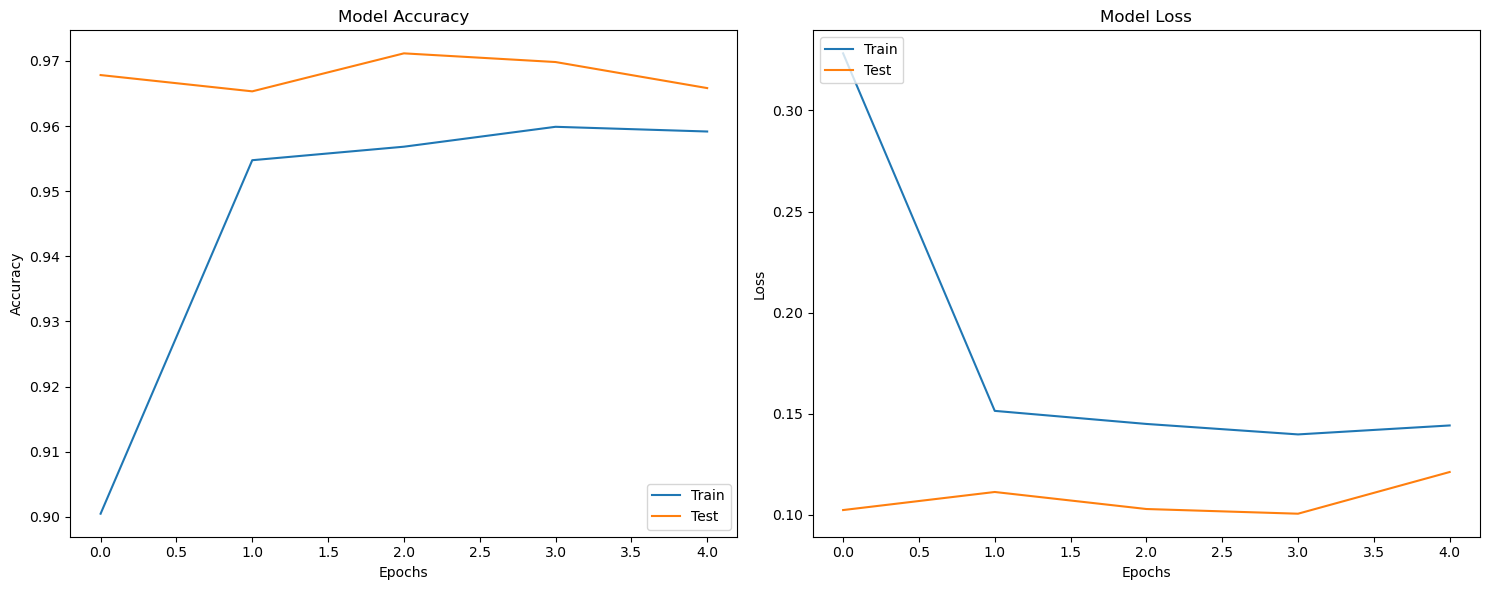

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.subplot(1,2,2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.tight_layout()


## Predictions

In [24]:
preds = model.predict(x_test)

313/313 [==============================] - 9s 27ms/step


In [25]:
preds.shape

(10000, 10)

In [26]:
preds

array([[5.5263177e-16, 4.9098142e-15, 9.0388580e-14, ..., 1.0000000e+00,
        2.9302298e-15, 1.6710666e-11],
       [5.8994826e-10, 2.1320632e-06, 9.9999785e-01, ..., 2.4598261e-08,
        2.7879699e-12, 2.3069240e-10],
       [3.4905614e-12, 1.0000000e+00, 3.2070086e-11, ..., 4.7685282e-09,
        3.1656541e-10, 2.8207675e-10],
       ...,
       [8.1558433e-17, 3.8363196e-10, 3.7577363e-14, ..., 6.8788074e-12,
        3.0108312e-12, 1.4358342e-07],
       [2.5346960e-06, 2.1418357e-08, 4.3960128e-07, ..., 2.1809515e-06,
        4.2256196e-03, 1.0300685e-05],
       [1.4210275e-06, 4.4038983e-12, 6.6007408e-12, ..., 2.2665746e-15,
        1.3485327e-11, 1.7380199e-10]], dtype=float32)

In [27]:
predicted = np.argmax(preds,axis=1) ## Here we will convert a 2d output matrix to a 1d vector with the values. 

In [28]:
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
y_test = np.argmax(y_test,axis=1) ##converting a 2d one hot encoding matrix to a 1d vector.

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=int64)

## Checking the accuracy of your model against the predicted values 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted) ##

0.9724